In [1]:
import pandas as pd

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
import seaborn as sns

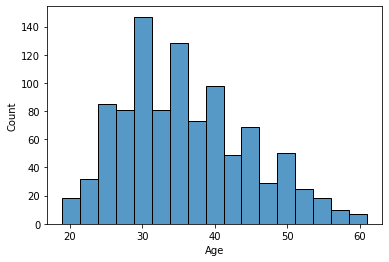

In [11]:
sns.histplot(data=ad_data['Age'])

In [20]:
ad_data[['Age','Area Income']]

,Age,Area Income
0,35,61833.90
1,31,68441.85
2,26,59785.94
3,29,54806.18
4,35,73889.99
...,...,...
995,30,71384.57
996,45,67782.17
997,51,42415.72
998,19,41920.79


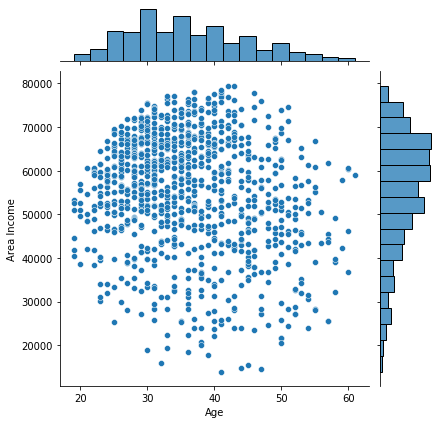

In [25]:
sns.jointplot(data=ad_data[['Age','Area Income']], x="Age", y="Area Income")

In [28]:
ad_data[["Daily Time Spent on Site","Age"]]

,Daily Time Spent on Site,Age
0,68.95,35
1,80.23,31
2,69.47,26
3,74.15,29
4,68.37,35
...,...,...
995,72.97,30
996,51.30,45
997,51.63,51
998,55.55,19


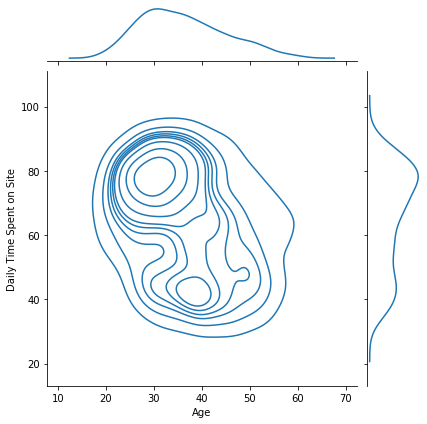

In [32]:
sns.jointplot(data=ad_data[["Daily Time Spent on Site","Age"]], x="Age", y="Daily Time Spent on Site", kind="kde")

In [33]:
ad_data[["Daily Time Spent on Site","Daily Internet Usage"]]

,Daily Time Spent on Site,Daily Internet Usage
0,68.95,256.09
1,80.23,193.77
2,69.47,236.50
3,74.15,245.89
4,68.37,225.58
...,...,...
995,72.97,208.58
996,51.30,134.42
997,51.63,120.37
998,55.55,187.95


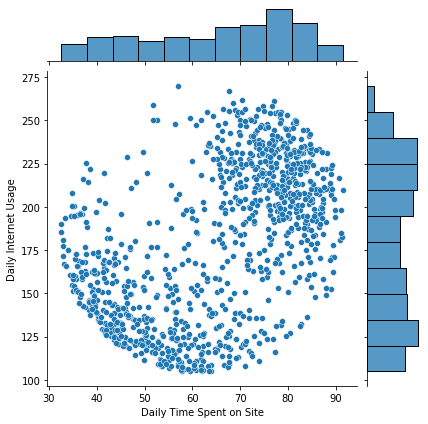

In [35]:
sns.jointplot(data=ad_data[["Daily Time Spent on Site","Daily Internet Usage"]], x="Daily Time Spent on Site", y="Daily Internet Usage")

In [38]:
ad_data["Clicked on Ad"]

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

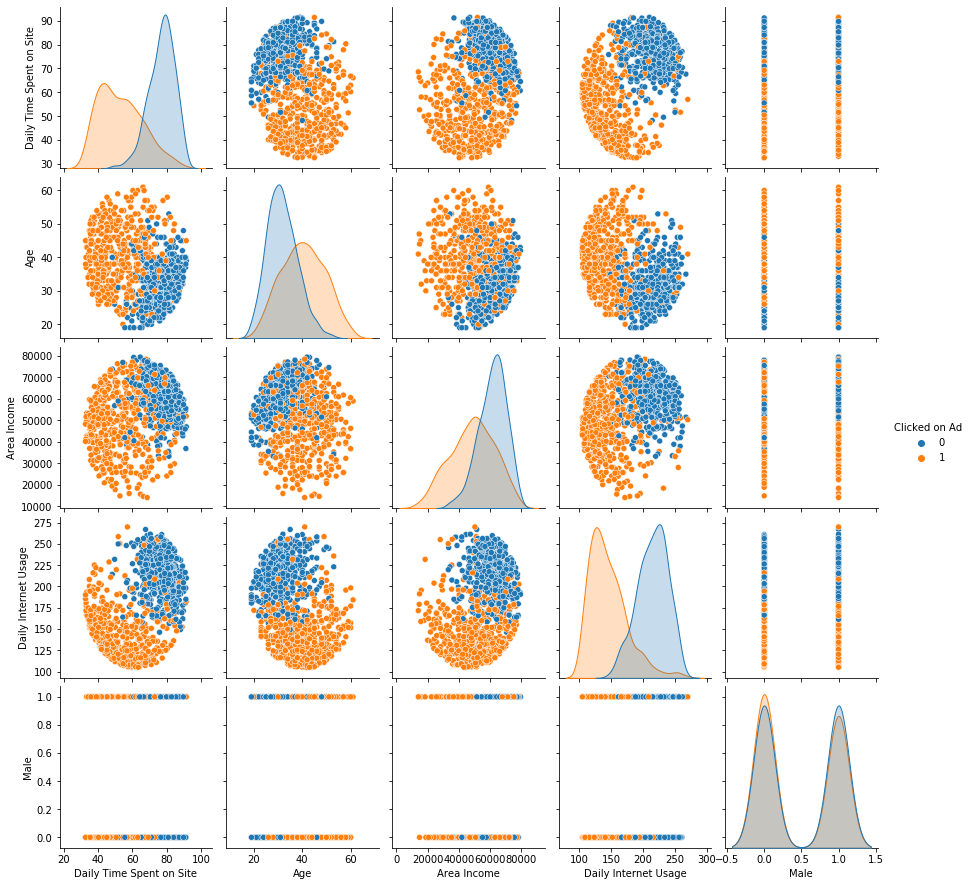

In [41]:
sns.pairplot(ad_data, hue="Clicked on Ad")

In [45]:
from sklearn.model_selection import train_test_split

In [63]:
ad_data.drop(["Clicked on Ad", "Ad Topic Line", "City", "Country", "Timestamp"], axis=1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [64]:
X_train,X_test,y_train,y_test=train_test_split(ad_data.drop(["Clicked on Ad", "Ad Topic Line", "City", "Country", "Timestamp"], axis=1), ad_data["Clicked on Ad"],test_size=0.30)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()

In [68]:
res = lr.fit(X_train, y_train)

In [69]:
pred = res.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       158
           1       0.92      0.88      0.90       142

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

